In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [31]:
train=pd.read_csv('titanic_train.csv')

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Missing data

In [33]:
train.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

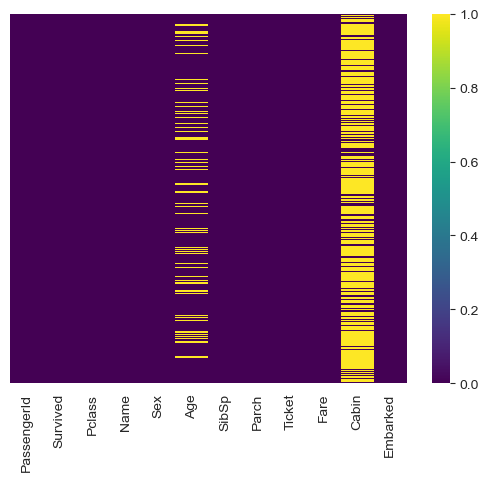

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')    

In [35]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

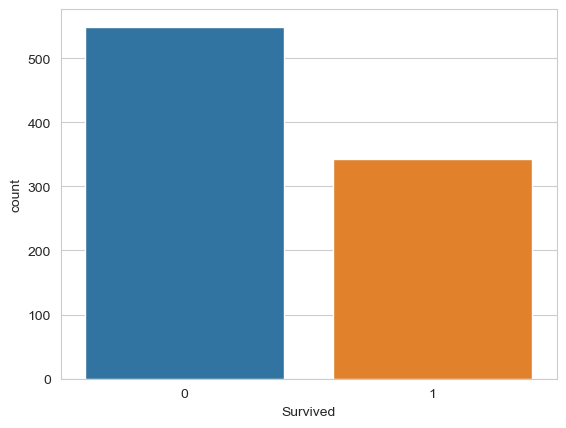

In [36]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

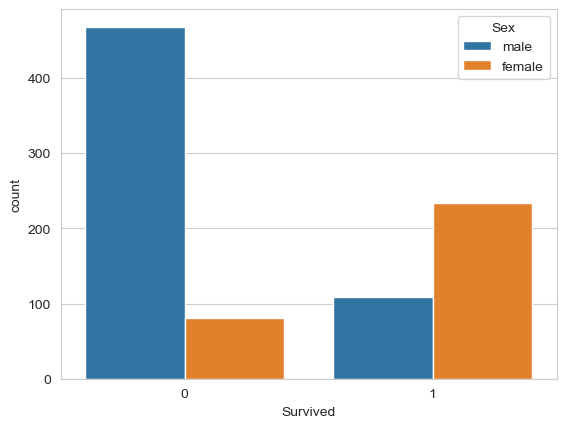

In [37]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

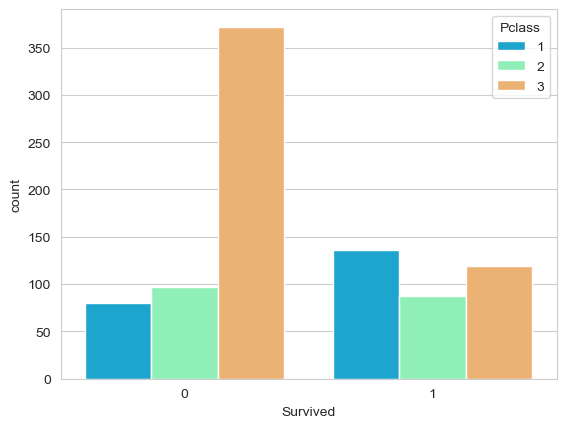

In [38]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')  

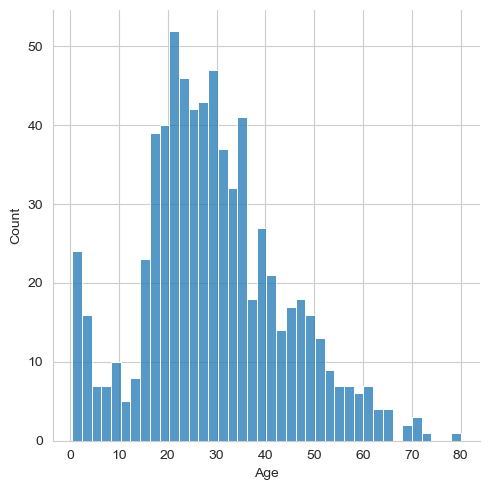

In [39]:
sns.displot(train['Age'].dropna(),kde=False,bins=40 )      

<AxesSubplot:>

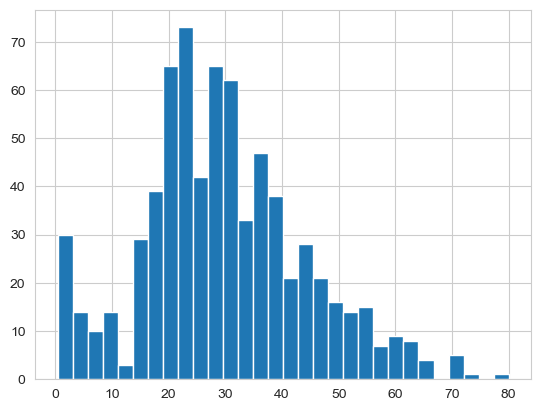

In [40]:
train['Age'].hist(bins=30) 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

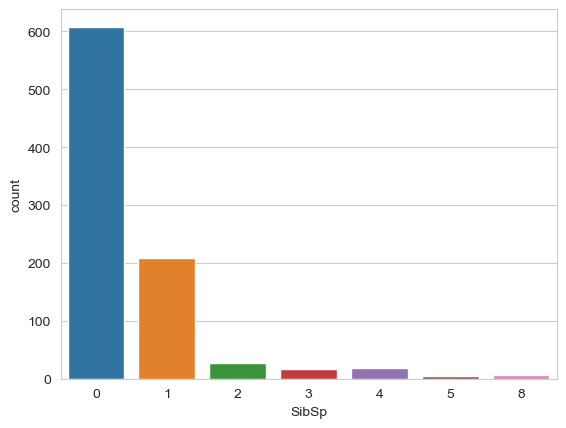

In [41]:
sns.countplot(x='SibSp',data=train)

# Data Processing

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

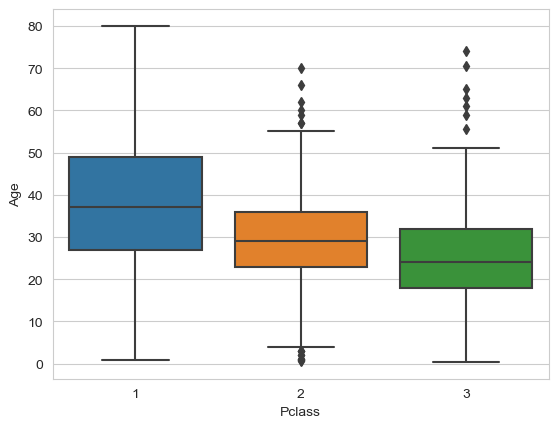

In [42]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [43]:
def age_process(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [44]:
train['Age']=train[['Age','Pclass']].apply(age_process,axis=1)

<AxesSubplot:>

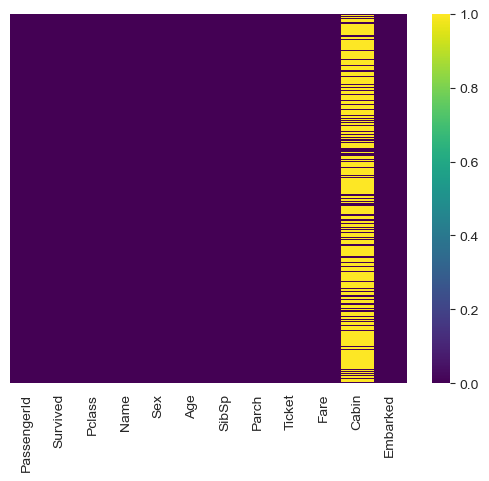

In [45]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [46]:
train.drop('Cabin',axis=1,inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

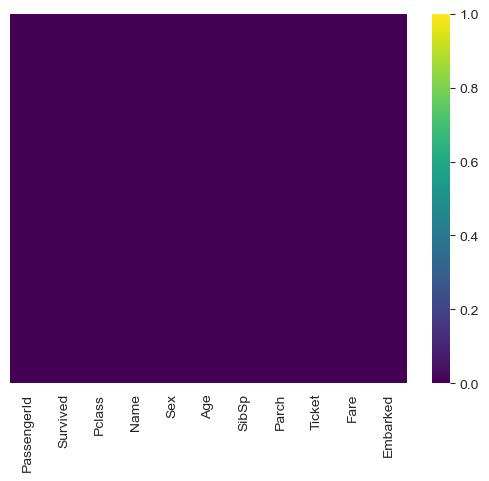

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

# processing categorical data

In [48]:
#train['Sex']=train['Sex'].replace({'male':1,'female':0}) 
#pd.get_dummies(train['Sex']) 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [49]:
train['Sex']=train['Sex'].replace({'male':1,'female':0})

In [50]:
#pd.get_dummies(train['Sex'],drop_first=True)

In [51]:
#sex=pd.get_dummies(train['Sex'],drop_first=True)
embarke=pd.get_dummies(train['Embarked'],drop_first=True)

In [53]:
embarke

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [54]:
train.drop(['Name','Embarked','Ticket'],axis=1,inplace=True) 

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [56]:
pd.concat([train,embarke],axis=1) 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,1
888,889,0,3,0,24.0,1,2,23.4500,0,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


# Train Test split

In [58]:
y=train['Survived']
x=train.drop('Survived',axis=1)

In [59]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [60]:
from sklearn.model_selection import train_test_split

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1) 

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression() 

In [66]:
lr.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
prediction=lr.predict(xtest) 

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
score=accuracy_score(prediction,ytest) 

In [70]:
score

0.753731343283582

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
matrix=confusion_matrix(prediction,ytest)

In [75]:
matrix

array([[131,  44],
       [ 22,  71]], dtype=int64)

<AxesSubplot:>

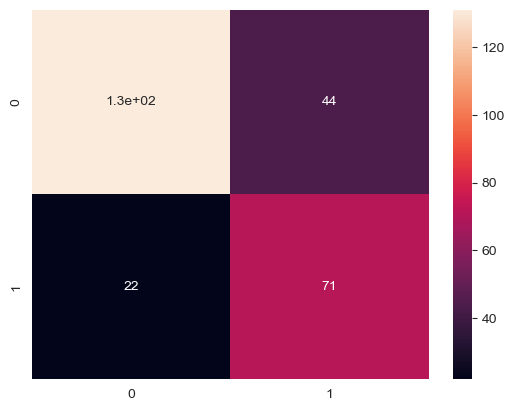

In [74]:
sns.heatmap(matrix,annot=True)